In [15]:
# Import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

In [17]:
# Normalize pixel values
X = X/255.0

In [18]:
# Split the dataset into training and  test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
# Train SVM classifier
svm_clf = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)

In [21]:
# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)
rf_pred = rf_clf.predict(X_test_scaled)

In [22]:
# Train K-NN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

In [23]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_true, y_pred))
    plt.figure(figsize=(10,7))
    cm = confusion_matrix(y_true, y_pred)
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show

K-NN Accuracy: 0.9460
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.96      0.98      0.97      1396
           7       0.94      0.93      0.94      1503
           8       0.97      0.90      0.93      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



<Figure size 720x504 with 0 Axes>

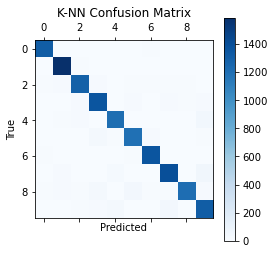

In [24]:
evaluate_model(y_test, knn_pred, "K-NN")

SVM Accuracy: 0.8580
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1343
           1       0.99      0.98      0.98      1600
           2       0.44      0.99      0.60      1380
           3       0.96      0.77      0.86      1433
           4       0.97      0.84      0.90      1295
           5       0.98      0.81      0.89      1273
           6       0.99      0.80      0.89      1396
           7       0.98      0.80      0.88      1503
           8       0.98      0.82      0.89      1357
           9       0.97      0.86      0.91      1420

    accuracy                           0.86     14000
   macro avg       0.93      0.86      0.87     14000
weighted avg       0.93      0.86      0.88     14000



<Figure size 720x504 with 0 Axes>

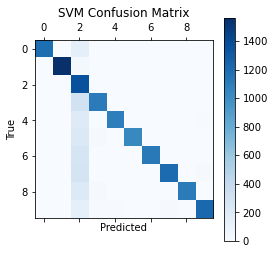

In [25]:
evaluate_model(y_test, svm_pred, "SVM")

Random Forest Accuracy: 0.9316
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       1.00      0.93      0.96      1600
           2       0.93      0.93      0.93      1380
           3       0.90      0.93      0.91      1433
           4       0.94      0.95      0.94      1295
           5       0.88      0.96      0.92      1273
           6       0.97      0.97      0.97      1396
           7       0.99      0.84      0.91      1503
           8       0.82      0.96      0.89      1357
           9       0.94      0.87      0.91      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.94      0.93      0.93     14000



<Figure size 720x504 with 0 Axes>

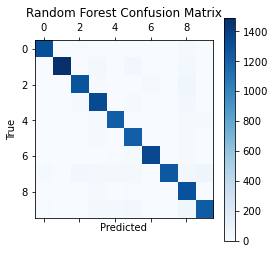

In [26]:
evaluate_model(y_test, rf_pred, "Random Forest")